In [1]:
import opendatasets as od
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
od.download('https://www.kaggle.com/datasets/ayushparwal2026/cars-dataset')

Skipping, found downloaded files in ".\cars-dataset" (use force=True to force download)


# Get Dataset Information 

this section below are useful to finding out the information related to the dataset. use `.info()` and `.describe()`

In [3]:
data = pd.read_csv('cars-dataset/used_cars_data.csv')
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


# Determine the columns to be used as feature and label

in this case i want to predict the fuel consumption per vehicle, so i the columns i need are year, fuel type, transmission, mileage, engine, power, and seats.

the label is the mileage, from the data, mileage column contain the fuel consumption. but there are 3 types of engine, in Indonesia, a family vehicle are only in 2 options, diesel or petrol. 

In [6]:
df = data[['Year', 'Fuel_Type', 'Transmission', 'Mileage', 'Engine', 'Power', 'Seats']]

In [7]:
df.head()

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,2010,CNG,Manual,26.6 km/kg,998 CC,58.16 bhp,5.0
1,2015,Diesel,Manual,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,2011,Petrol,Manual,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,2012,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,2013,Diesel,Automatic,15.2 kmpl,1968 CC,140.8 bhp,5.0


after we determine the columns to be used, then we must remove the excess data, like the fuel type, i want to use only diesel and petrol to be predicted.

In [8]:
df = df[df['Fuel_Type'].isin(['Petrol', 'Diesel'])]
df.head()

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
1,2015,Diesel,Manual,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,2011,Petrol,Manual,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,2012,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,2013,Diesel,Automatic,15.2 kmpl,1968 CC,140.8 bhp,5.0
6,2013,Diesel,Manual,23.08 kmpl,1461 CC,63.1 bhp,5.0


In [9]:
df.Fuel_Type.unique()

array(['Diesel', 'Petrol'], dtype=object)

## Display the correlation each variable

let's display the variable correlation

before we see the corrlation, we need to change all the dtype to numeric. for categorical we must map them

Diesel = 0<br>
Petrol = 1

Manual = 0<br>
Automatic = 1

In [10]:
for_corr = df.copy()

In [11]:
# mapping
fuel_map = lambda x: 1 if x.lower() == 'petrol' else 0
trans_map = lambda x: 1 if x.lower() == 'automatic' else 0

In [12]:
for_corr.Fuel_Type = for_corr.Fuel_Type.map(fuel_map)
for_corr.Transmission = for_corr.Transmission.map(trans_map)

lets change the the rest by remove all the string from the engine, mileage, and power. After that we cast the dtype to numeric(float)

In [13]:
# extractor 
ext = lambda x: x.replace('null bhp', np.NaN).str.replace(r'[^0-9.]', '', regex=True).astype(np.float64)

In [14]:
for_corr[['Engine', 'Mileage', 'Power']] = for_corr[['Engine', 'Mileage', 'Power']].apply(ext)

In [16]:
for_corr.head()

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
1,2015,0,0,19.67,1582.0,126.20,5.0
2,2011,1,0,18.20,1199.0,88.70,5.0
3,2012,0,0,20.77,1248.0,88.76,7.0
4,2013,0,1,15.20,1968.0,140.80,5.0
6,2013,0,0,23.08,1461.0,63.10,5.0


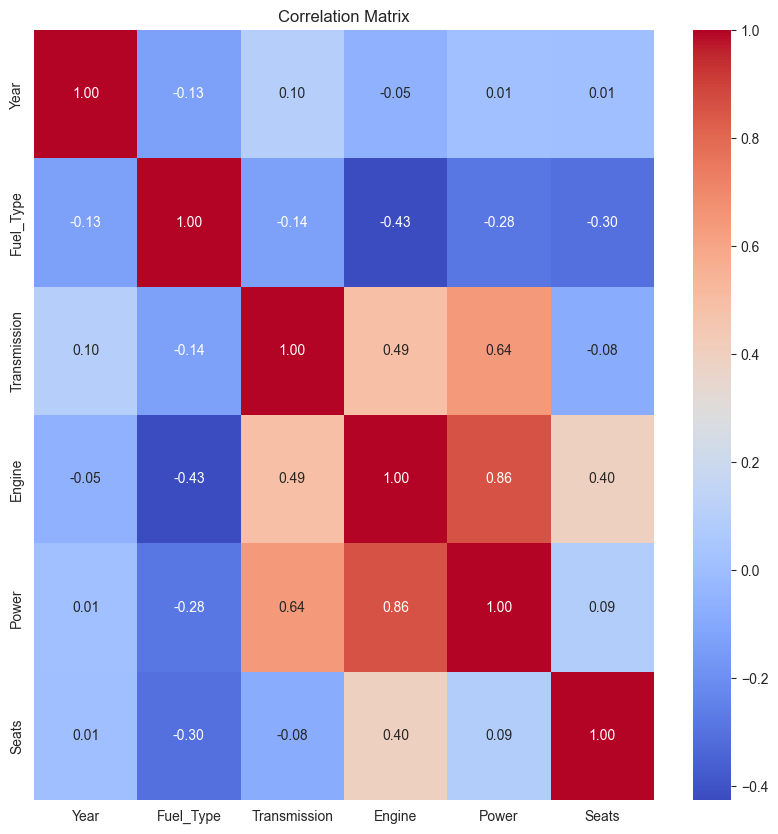

In [17]:
corr_matrix = for_corr.drop('Mileage', axis=1).corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix')
plt.show()

as we can see in the correlation heatmap, Year of a car doesn't have much effect on the data. so we can drop 'Year' column, and then we can see the Seats, seats has much impact on the engine, because in reality, the 5 seater car has smaller weight than 7 seater

In [18]:
df = df.drop('Year', axis=1)
df.head()

,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
1,Diesel,Manual,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Petrol,Manual,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Diesel,Automatic,15.2 kmpl,1968 CC,140.8 bhp,5.0
6,Diesel,Manual,23.08 kmpl,1461 CC,63.1 bhp,5.0


Let's find the missing value first and then re apply the preprocessing function that we have created before

In [19]:
df.isna().sum()

Fuel_Type        0
Transmission     0
Mileage          0
Engine          46
Power           46
Seats           53
dtype: int64

In [20]:
df.count()

Fuel_Type       7177
Transmission    7177
Mileage         7177
Engine          7131
Power           7131
Seats           7124
dtype: int64

In [21]:
df = df.dropna()
df.count()

Fuel_Type       7124
Transmission    7124
Mileage         7124
Engine          7124
Power           7124
Seats           7124
dtype: int64

In [22]:
df.Fuel_Type = df.Fuel_Type.map(fuel_map)
df.Transmission = df.Transmission.map(trans_map)
df[['Engine', 'Mileage', 'Power']] = df[['Engine', 'Mileage', 'Power']].apply(ext)
df.head()

,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
1,0,0,19.67,1582.0,126.20,5.0
2,1,0,18.20,1199.0,88.70,5.0
3,0,0,20.77,1248.0,88.76,7.0
4,0,1,15.20,1968.0,140.80,5.0
6,0,0,23.08,1461.0,63.10,5.0


## Note

the prediction on car fuel consumption is close to regression.<br>
Because of that we need to sort the Mileage column from lowest to highest 

In [23]:
sorted_data = df.sort_values(by='Mileage', ascending=True)
sorted_data.head(10)

,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
5647,0,0,0.0,2446.0,NaN,8.0
3210,0,1,0.0,2987.0,165.00,5.0
962,0,1,0.0,1950.0,194.00,5.0
2267,0,0,0.0,2446.0,NaN,10.0
996,1,0,0.0,1086.0,62.00,5.0
3271,1,0,0.0,1086.0,62.00,5.0
6090,1,0,0.0,1086.0,62.00,5.0
6011,1,1,0.0,3597.0,262.60,5.0
6093,1,0,0.0,1086.0,NaN,5.0
544,1,1,0.0,1950.0,181.43,5.0


In [24]:
sorted_data.isna().sum()

Fuel_Type         0
Transmission      0
Mileage           0
Engine            0
Power           124
Seats             0
dtype: int64

In [25]:
(sorted_data['Mileage'] == 0).sum()

67

In [26]:
# deleting variable to free up memory usage
del sorted_data, for_corr

# Removing unnecessary data

After the data is cleaning, there are still some NaN value in DataFrame, this because the actual data from the dataset are like 'null bhp' and the mileage are 0.

Both of the criteria must be dropped to clean the data<br>
1. Remove NaN
2. Remove 0 on Mileage

In [27]:
df = df.dropna()
df.head(10)

,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
1,0,0,19.67,1582.0,126.20,5.0
2,1,0,18.20,1199.0,88.70,5.0
3,0,0,20.77,1248.0,88.76,7.0
4,0,1,15.20,1968.0,140.80,5.0
6,0,0,23.08,1461.0,63.10,5.0
7,0,1,11.36,2755.0,171.50,8.0
8,0,0,20.54,1598.0,103.60,5.0
9,0,0,22.30,1248.0,74.00,5.0
10,1,0,21.56,1462.0,103.25,5.0
11,1,1,16.80,1497.0,116.30,5.0


In [28]:
df = df[df['Mileage'] != 0]
df.head(10)

,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
1,0,0,19.67,1582.0,126.20,5.0
2,1,0,18.20,1199.0,88.70,5.0
3,0,0,20.77,1248.0,88.76,7.0
4,0,1,15.20,1968.0,140.80,5.0
6,0,0,23.08,1461.0,63.10,5.0
7,0,1,11.36,2755.0,171.50,8.0
8,0,0,20.54,1598.0,103.60,5.0
9,0,0,22.30,1248.0,74.00,5.0
10,1,0,21.56,1462.0,103.25,5.0
11,1,1,16.80,1497.0,116.30,5.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6966 entries, 1 to 7252
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fuel_Type     6966 non-null   int64  
 1   Transmission  6966 non-null   int64  
 2   Mileage       6966 non-null   float64
 3   Engine        6966 non-null   float64
 4   Power         6966 non-null   float64
 5   Seats         6966 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 381.0 KB


## Plot for the relation each Variable with Mileage

using the scatter plot for easier to read<br> 
1. Engine to Mileage
2. Power to Mileage
3. Seats to Mileage

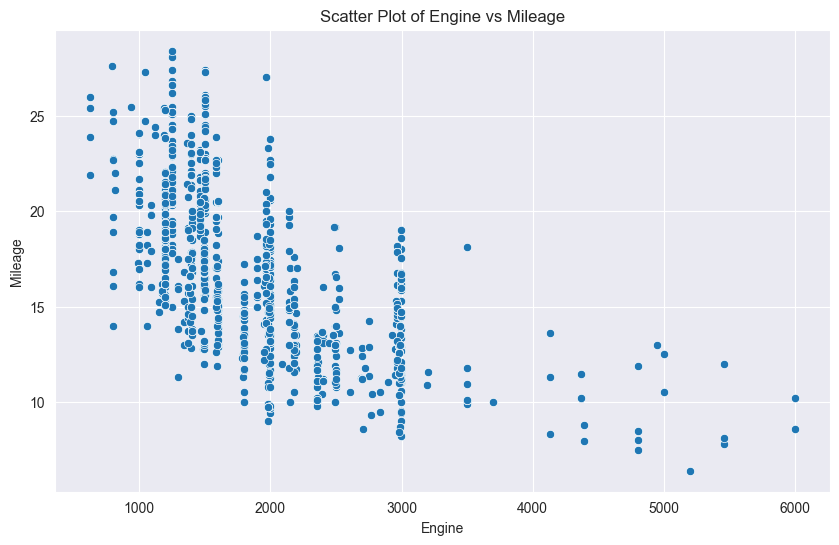

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine', y='Mileage', data=df)
plt.title('Scatter Plot of Engine vs Mileage')
plt.xlabel('Engine')
plt.ylabel('Mileage')
plt.show()

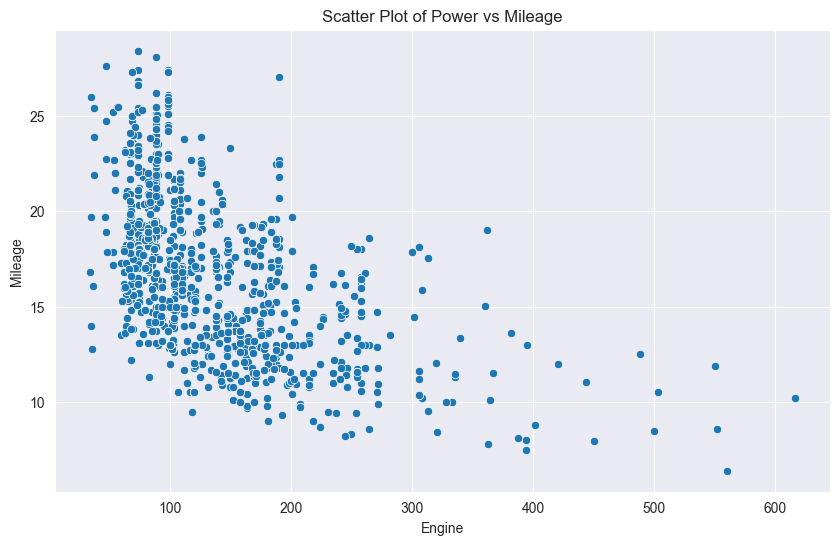

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power', y='Mileage', data=df)
plt.title('Scatter Plot of Power vs Mileage')
plt.xlabel('Engine')
plt.ylabel('Mileage')
plt.show()

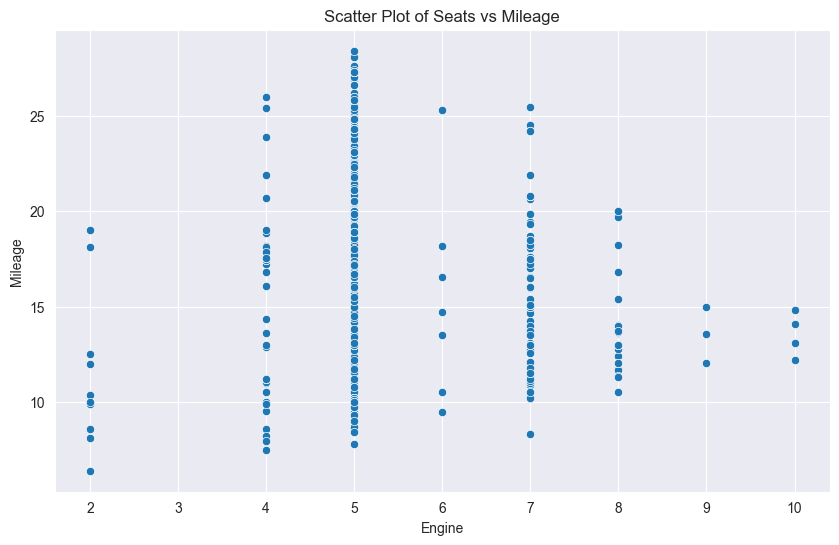

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats', y='Mileage', data=df)
plt.title('Scatter Plot of Seats vs Mileage')
plt.xlabel('Engine')
plt.ylabel('Mileage')
plt.show()

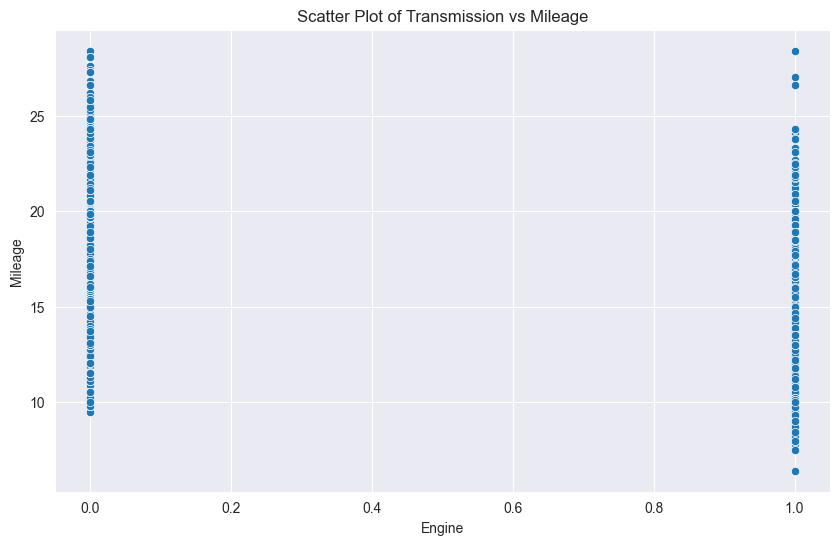

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transmission', y='Mileage', data=df)
plt.title('Scatter Plot of Transmission vs Mileage')
plt.xlabel('Engine')
plt.ylabel('Mileage')
plt.show()

# Split for train and test also the feature and label

using `train_test_split` from scikit learn to help create a test batch with last 20% of data. 

In [34]:
df.head()

,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
1,0,0,19.67,1582.0,126.20,5.0
2,1,0,18.20,1199.0,88.70,5.0
3,0,0,20.77,1248.0,88.76,7.0
4,0,1,15.20,1968.0,140.80,5.0
6,0,0,23.08,1461.0,63.10,5.0


In [35]:
x, y = df.drop('Mileage', axis=1), df[['Mileage']]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=False, random_state=102)
x_train.head()

,Fuel_Type,Transmission,Engine,Power,Seats
1,0,0,1582.0,126.20,5.0
2,1,0,1199.0,88.70,5.0
3,0,0,1248.0,88.76,7.0
4,0,1,1968.0,140.80,5.0
6,0,0,1461.0,63.10,5.0


# Modeling

model is created using 1 input layer, 1 Hidden Layer, and 1 output layer. <br>
the input shape must be have the length of data feature(column). and the output must be set with 1 neuron with no activation or we cann wirite `activation='linear'`

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5, )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


Show the model as image with input and output shape

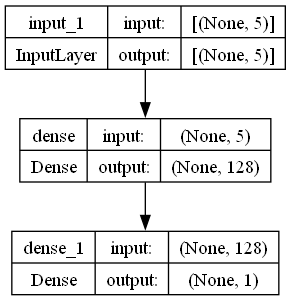

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)

Compiling the model with MSE Loss and Adaptive Algorithm Optimizer.

In this section i also create the custom callback to stop the model training when `val_loss` is less than equal 3.0

In [39]:
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam()
)

In [40]:
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_loss') <= 3:
            print('\n\nMSE loss under than equal 3, so stop training')
            self.model.stop_training = True

Training the model with 1000 epoch, `verbose=2` for apply the output of training only when its completed per epoch.<br>
I also use `validation_split=.2`, it means 20% of the `x_train` and `y_train` are used for validation data while training to determine the `val_loss` 

In [41]:
H = model.fit(
    x_train, y_train,
    epochs=1000,
    validation_split=.2,
    verbose=2,
    callbacks=[MyCustomCallback()]
)

Epoch 1/1000
140/140 - 1s - loss: 98.3405 - val_loss: 81.2494 - 1s/epoch - 8ms/step
Epoch 2/1000
140/140 - 0s - loss: 72.6684 - val_loss: 62.1425 - 497ms/epoch - 4ms/step
Epoch 3/1000
140/140 - 0s - loss: 60.1944 - val_loss: 50.8519 - 474ms/epoch - 3ms/step
Epoch 4/1000
140/140 - 0s - loss: 52.5280 - val_loss: 48.3176 - 465ms/epoch - 3ms/step
Epoch 5/1000
140/140 - 0s - loss: 50.1035 - val_loss: 37.4990 - 469ms/epoch - 3ms/step
Epoch 6/1000
140/140 - 0s - loss: 43.5422 - val_loss: 42.9370 - 478ms/epoch - 3ms/step
Epoch 7/1000
140/140 - 1s - loss: 34.2873 - val_loss: 48.1084 - 516ms/epoch - 4ms/step
Epoch 8/1000
140/140 - 1s - loss: 31.2044 - val_loss: 39.4160 - 702ms/epoch - 5ms/step
Epoch 9/1000
140/140 - 1s - loss: 31.6819 - val_loss: 33.2459 - 556ms/epoch - 4ms/step
Epoch 10/1000
140/140 - 1s - loss: 28.0062 - val_loss: 25.0222 - 520ms/epoch - 4ms/step
Epoch 11/1000
140/140 - 1s - loss: 27.1677 - val_loss: 32.3283 - 739ms/epoch - 5ms/step
Epoch 12/1000
140/140 - 1s - loss: 26.5525 -

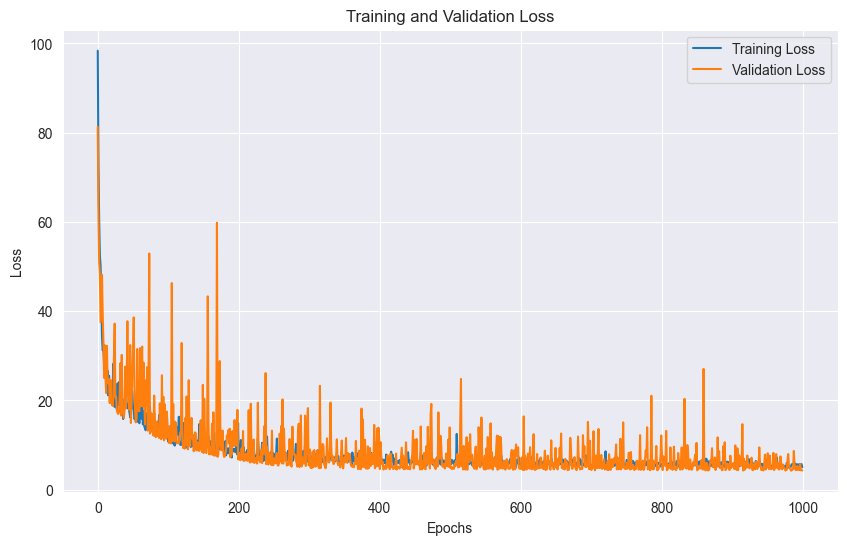

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make a Prediction

the output of the `model.predict` is floating number, this happen because the activation is linear and 1 neuron. Next, the predicted number were compared to the actual label number saved on `y_test`.

I create the function to calculate the MSE and MAPE

In [43]:
prediction = model.predict(x_test)

44/44 [==============================] - 0s 2ms/step


In [44]:
prediction

array([[20.382767],
       [21.457582],
       [14.350733],
       ...,
       [20.38325 ],
       [18.760448],
       [15.78808 ]], dtype=float32)

In [45]:
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred)).numpy()

def mean_absolute_percentage_error(y_true, y_pred):
    if np.any(y_true == 0):
        raise ValueError("MAPE cannot be calculated when actual values contain zero.")
    
    absolute_percentage_errors = np.abs((y_true - y_pred) / y_true) * 100
    return np.mean(absolute_percentage_errors)

In [46]:
print(f"test MSE : {mean_squared_error(y_test, prediction)}")

test MSE : 4.443290080072254


In [47]:
print(f"test MAPE : {mean_absolute_percentage_error(y_test, prediction)}")

test MAPE : 9.234500341497872


### Make a dummy test

In [48]:
dummy = pd.DataFrame({
    'fuel': ['Petrol'],
    'transmission': ['Manual'],
    'engine': ['6200'],
    'power': ['650'],
    'seats': ['5']
})

dummy.fuel = dummy.fuel.map(fuel_map) 
dummy.transmission = dummy.transmission.map(fuel_map)
dummy[['engine', 'power', 'seats']] = dummy[['engine', 'power', 'seats']].apply(ext)
dummy


,fuel,transmission,engine,power,seats
0,1,0,6200.0,650.0,5.0


In [49]:
model.predict(dummy)

1/1 [==============================] - 0s 27ms/step


array([[7.260039]], dtype=float32)